<p style="font-family: Arial; font-size:2.4em;color:red;">The Spark Foundation GRIP AUGUST'21</p>
<p style="font-family: Arial; font-size:2.0em;color:red;">Data Science and Business Analytics</p>

<p style="font-family: Arial; font-size:1.8em;color:blue;">Task 2:-Prediction using Unsupervised ML (Level - Beginner)</p>
<p style="font-family: Arial; font-size:1.6em;color:blue;"> From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually.</p>
<p style="font-family: Arial; font-size:1.8em;color:green;">AUTHOR : DIPSY </p>

<p style="font-family: Arial; font-size:1.6em;color:black;">IMPORTING THE LIBRARIES</p>

In [5]:
#Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

<p style="font-family: Arial; font-size:1.6em;color:black;">READIND AND LOADING THE DATASET</p>

In [6]:
#Load the Iris dataset

path=r'C:\Users\om\Downloads\Iris.csv'
iris=pd.read_csv(path)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
#To see the firt 5 rows
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#To see the last 5 rows
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


<p style="font-family: Arial; font-size:1.6em;color:black;">BASIC EXPLORATORY DATA ANALYSIS</p>

In [9]:
iris.shape

(150, 6)

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [11]:
DeleteList=['Id']
iris=iris.drop(DeleteList, axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [171]:
#Checking for missing values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [172]:
#Checking for duplicate entries
iris.duplicated().sum()

0

In [173]:
#Checking for the unique entries
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [13]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


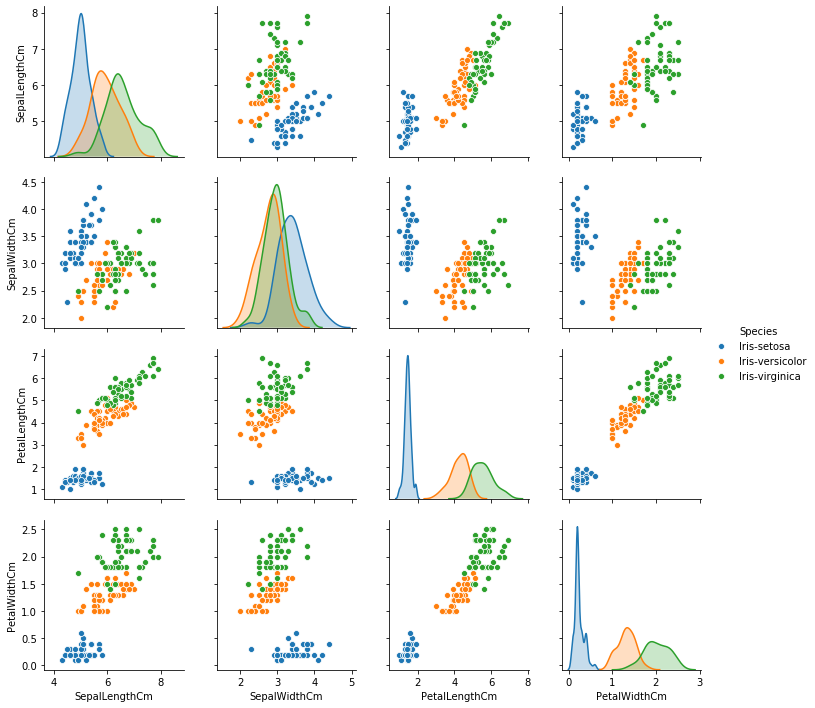

In [14]:
sns.pairplot(iris, hue='Species')

<p style="font-family: Arial; font-size:1.6em;color:black;">Finding the optimal no. of clusters for K-Means Classification and determining the value of K using the elbow method :</p>
<p style="font-family: Arial; font-size:1.0em;color:black;">K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.</p>

In [16]:
# Finding the optimum number of clusters for k-means classification
x = iris.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

<p style="font-family: Arial; font-size:1.6em;color:black;">Plotting The Elbow Graph To Find Optimal Value Of 'k'</p>

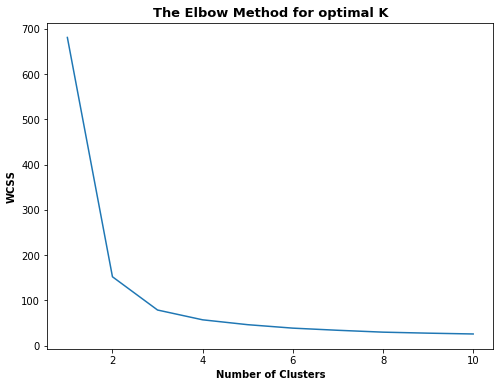

In [17]:
# Plotting the results onto a line graph, 
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method for optimal K",fontsize =13,fontweight = "bold")
plt.xlabel("Number of Clusters",fontweight = "bold")
plt.ylabel("WCSS",fontweight = "bold") # Within cluster sum of squares
plt.show()


<p style="font-family: Arial; font-size:1.1em;color:black;">The optimal number of clusters is given by the sharp turn in the Elbow graph. In this case, the optimal number of clusters is k=3.</p>

<p style="font-family: Arial; font-size:1.6em;color:black;">Creating K-Means Clustering</p>

In [52]:
# Applying K-means to the dataset
# Creating the K-means classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)
print(iris_k_mean_model.labels_)
print(iris_k_mean_model.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


<p style="font-family: Arial; font-size:1.6em;color:black;">Visualizing The Cluster Data</p>

Text(0.5, 1.0, 'K-Means Clustering')

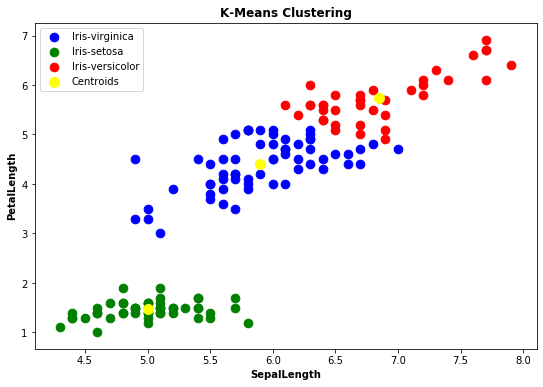

In [53]:
# Visualising the clusters 
plt.figure(figsize=(9,6))
plt.scatter(iris.iloc[y_kmeans==0,0],iris.iloc[y_kmeans==0,2],s=75,c='blue',label='Iris-virginica')
plt.scatter(iris.iloc[y_kmeans==1,0],iris.iloc[y_kmeans==1,2],s=75,c='green',label='Iris-setosa')
plt.scatter(iris.iloc[y_kmeans==2,0],iris.iloc[y_kmeans==2,2],s=75,c='red',label='Iris-versicolor')
plt.scatter(iris_k_mean_model.cluster_centers_[:,0],iris_k_mean_model.cluster_centers_[:,2],s=100,c='yellow',label='Centroids')
plt.legend()
plt.xlabel('SepalLength', fontweight = "bold")
plt.ylabel('PetalLength', fontweight ="bold")
plt.title('K-Means Clustering', fontweight = "bold")

<p style="font-family: Arial; font-size:1.6em;color:black;">3D Visualization Of The Cluster Data</p>

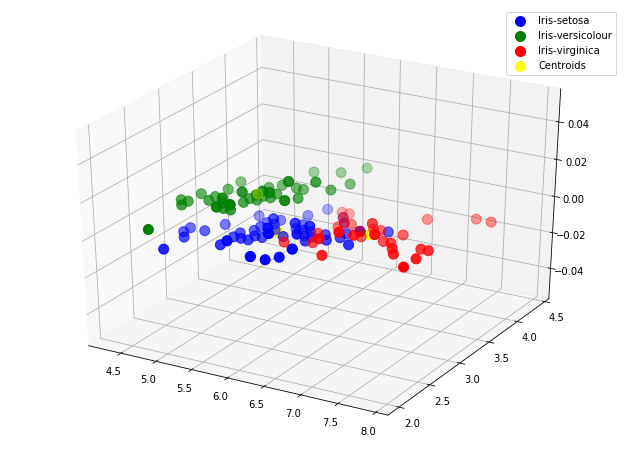

In [54]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (11,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], 
            s = 100, c = 'red', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()